Jinja in practice

- API is the backend of Jinja (https://jinja.palletsprojects.com/en/3.1.x/api/)
    > Environment is Central Object, which stores configs and global objects
    > Apps create the Environment, when initialized, and load templates. So using Template Class also will lead to Environment intiation
    > Templates are loaded using PackageLoader
    
- Template language is the front-end (https://jinja.palletsprojects.com/en/3.1.x/templates/)

In [3]:
from jinja2 import (
    Environment, 
    PackageLoader, 
    select_autoescape,
    FileSystemLoader
    )
env = Environment(
    loader=FileSystemLoader('templates'),
    autoescape=select_autoescape()
)

In [4]:
env_app = Environment(
    loader=PackageLoader("appy"),
    autoescape=select_autoescape()
)
# folder tree has to be appy/templates

In [7]:
# get template from one.html

template1 = env.get_template("one.html")
print(template1.render())

<!DOCTYPE html>
<head>
    <title>Template</title>
</head>
<body>
    
</body>
</html>


In [8]:
print(template1.render(thing='New Word'))

<!DOCTYPE html>
<head>
    <title>Template</title>
</head>
<body>
    New Word
</body>
</html>


In [9]:
template2 = env_app.get_template("one.html")
print(template2.render(sense='This is nice'))

<!DOCTYPE html>
<head><title>InAppy</title></head>
<body>
    <h1>Makes Sense</h1>
    <p>This is nice</p>
</body>
</html>


>> There is environment which knows where your templates are present

>> These templates are loaded as instances

>> Which contain the render method, which takes the argument to render in the template

In [10]:
# from django days
context = {
    "sense": "dicting it out"
}
print(template2.render(**context))

<!DOCTYPE html>
<head><title>InAppy</title></head>
<body>
    <h1>Makes Sense</h1>
    <p>dicting it out</p>
</body>
</html>


In [30]:
# Lets grow it out
context = {
    "thing": "Super Mario",
    "data": [
        {"name": "wiggle", "count": 2},
        {"name": "witte", "count": 152},
        {"name": "riee", "count": 26},
        {"name": "wets", "count": 322},
        {"name": "lesf", "count": 275},
    ]
}

updt_template = env.get_template("one.html")
print(updt_template.render(**context))

<!DOCTYPE html>
<head>
    <title>Template</title>
</head>
<body>
    
</body>
</html>


In [31]:
# The template which is rendered / selected matters
two_template = env.get_template("two.html")
print(two_template.render(**context))

<!DOCTYPE html>
<head>
    <title>Template</title>
</head>
<body>
    
<h1>Super Mario</h1>
<table>
    <th>
        <td>name</td>
        <td>count</td>
    </th>
    
        <tr >
            <td>wiggle</td>
            <td>2</td>
    
        <tr >
            <td>witte</td>
            <td>152</td>
    
        <tr  class="diff" >
            <td>riee</td>
            <td>26</td>
    
        <tr >
            <td>wets</td>
            <td>322</td>
    
        <tr >
            <td>lesf</td>
            <td>275</td>
    
</table>

</body>
</html>


In [20]:
env.list_templates()

['one.html', 'two.html']

In [21]:
# just creating the files ore pasting from outside 
# adds them to template
env_app.list_templates()

['one.html', 'two.html']

In [24]:
t_string = env.from_string(source="This is {{ nice }} template")
print(t_string.render(nice="good looking"))

This is good looking template


In [26]:
from jinja2.nativetypes import NativeEnvironment

na_env = NativeEnvironment()

t = na_env.from_string('{{ p * f }}')
print(t.render(p=5, f=2))

10


In [27]:
t_list = na_env.from_string('[{% for item in data %} {{ item + 1}} {% endfor %}]')
print(t_list.render(data=[5, 6, 8, 7, 9]))

[ 6  7  9  8  10 ]


Templates contain **variables**, **statements**, **comments**, **tests** and **expression**, and **tags** control the logic

- {% ... %} for statement

- {{ ... }} expresion / variables

- {# ... #} comments

- {{ name|striptags|title }} filters

- {% if loop.index is divisibleby 3 %} tests

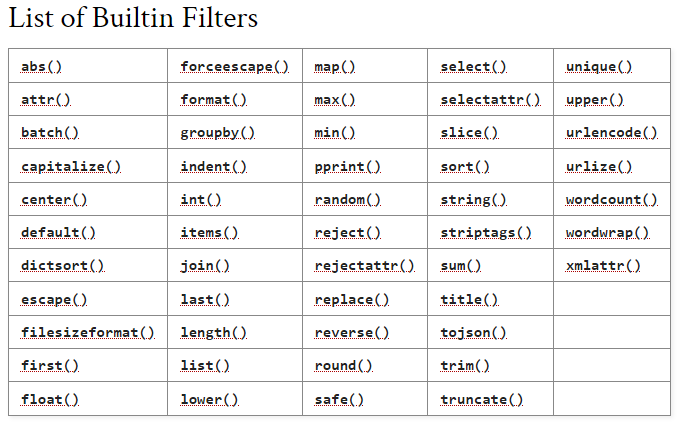

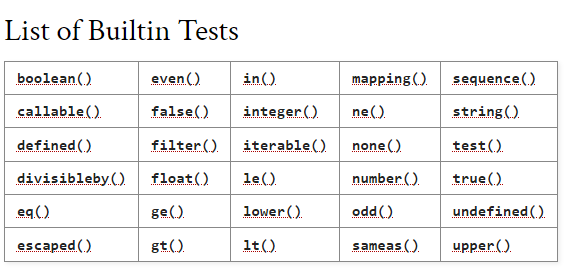

###  Escaping works by piping the variable through the |e filter:

In [38]:
# for control structure
for_string = """
<h1>Members</h1>
<ul>
{% for user in users %}
  <li>{{ user|e }}</li>
{% endfor %}
</ul>
"""
for_temp = env.from_string(for_string)
user_list = ['am', 'you', 'they', 'me', 'him']
user_dict = {'name1':'am',
             'name2':'you',
             'name3':'they',
             'name4':'me',
             'name5':'him'}
print(for_temp.render(users=user_list))


<h1>Members</h1>
<ul>

  <li>am</li>

  <li>you</li>

  <li>they</li>

  <li>me</li>

  <li>him</li>

</ul>


In [39]:
dict_string = """<dl>
{% for key, value in my_dict.items() %}
    <dt>{{ key|e }}</dt>
    <dd>{{ value|e }}</dd>
{% endfor %}
</dl>"""
dict_template = env.from_string(dict_string)
print(dict_template.render(my_dict = user_dict))

<dl>

    <dt>name1</dt>
    <dd>am</dd>

    <dt>name2</dt>
    <dd>you</dd>

    <dt>name3</dt>
    <dd>they</dd>

    <dt>name4</dt>
    <dd>me</dd>

    <dt>name5</dt>
    <dd>him</dd>

</dl>


In [40]:
sort_string = """<dl>
{% for key, value in my_dict | dictsort %}
    <dt>{{ key|e }}</dt>
    <dd>{{ value|e }}</dd>
{% endfor %}
</dl>"""
sort_template = env.from_string(sort_string)
print(sort_template.render(my_dict = user_dict))

<dl>

    <dt>name1</dt>
    <dd>am</dd>

    <dt>name2</dt>
    <dd>you</dd>

    <dt>name3</dt>
    <dd>they</dd>

    <dt>name4</dt>
    <dd>me</dd>

    <dt>name5</dt>
    <dd>him</dd>

</dl>


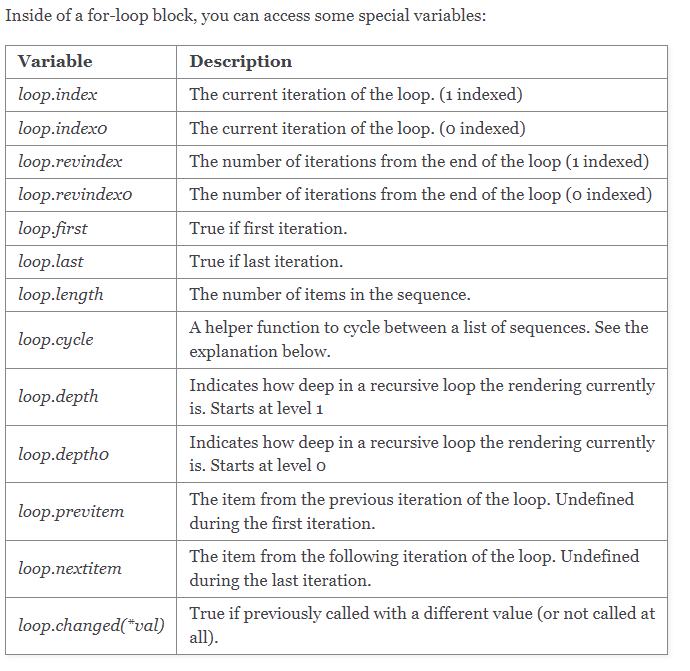

In [41]:
cycle_string = """
{% for row in rows %}
    <li class="{{ loop.cycle('odd', 'even') }}">{{ row }}</li>
{% endfor %}
"""
ccle_tem = env.from_string(cycle_string)
print(ccle_tem.render(rows=user_list))



    <li class="odd">am</li>

    <li class="even">you</li>

    <li class="odd">they</li>

    <li class="even">me</li>

    <li class="odd">him</li>



In [45]:
if_string = """
{% if kenny.sick %}
    Kenny is sick.
{% elif kenny.dead %}
    You killed Kenny!  You bastard!!!
{% else %}
    Kenny looks okay --- so far
{% endif %}
"""
kenny= {"sick":False,
        "dead":False}
if_temp = env.from_string(if_string)
print(if_temp.render(kenny=kenny))



    Kenny looks okay --- so far



In [48]:
# Lets grow it out
context = {
    "thing": "Super Mario",
    "data": [
        {"name": "wiggle", "count": 2},
        {"name": "witte", "count": 152},
        {"name": "riee", "count": 26},
        {"name": "wets", "count": 322},
        {"name": "lesf", "count": 275},
    ]
}

updt_template = env.get_template("one.html")
print(updt_template.render(**context))

<!DOCTYPE html>
<head>
    <title>Included Template</title>
</head>
<body>
    
</body>
<footer>
    <p>this is nice</p>
</footer>
</html>


In [1]:
import json

file_path = "D:\\gitFolders\\python_de_learners_data\\code_script_notebooks\\projects\\learning_hf_philosophy\\task_arch.json"

with open(file_path, 'r') as mod:
    arch_task = json.load(mod)

# print(arch_task.keys())

tasks = list(arch_task.keys())

# arch_task[tasks[0]]  # dictionary of archs, model classes, 

{'architectures': ['ALBERT',
  'BART',
  'BERT',
  'BigBird',
  'BigBird-Pegasus',
  'BioGpt',
  'BLOOM',
  'CamemBERT',
  'CANINE',
  'CodeLlama',
  'ConvBERT',
  'CTRL',
  'Data2VecText',
  'DeBERTa',
  'DeBERTa-v2',
  'DistilBERT',
  'ELECTRA',
  'ERNIE',
  'ErnieM',
  'ESM',
  'Falcon',
  'FlauBERT',
  'FNet',
  'Funnel Transformer',
  'GPT-Sw3',
  'OpenAI GPT-2',
  'GPTBigCode',
  'GPT Neo',
  'GPT NeoX',
  'GPT-J',
  'I-BERT',
  'LayoutLM',
  'LayoutLMv2',
  'LayoutLMv3',
  'LED',
  'LiLT',
  'LLaMA',
  'Longformer',
  'LUKE',
  'MarkupLM',
  'mBART',
  'MEGA',
  'Megatron-BERT',
  'Mistral',
  'Mixtral',
  'MobileBERT',
  'MPNet',
  'MPT',
  'MRA',
  'MT5',
  'MVP',
  'Nezha',
  'Nyströmformer',
  'OpenLlama',
  'OpenAI GPT',
  'OPT',
  'Perceiver',
  'Persimmon',
  'Phi',
  'PLBart',
  'QDQBert',
  'Qwen2',
  'Reformer',
  'RemBERT',
  'RoBERTa',
  'RoBERTa-PreLayerNorm',
  'RoCBert',
  'RoFormer',
  'SqueezeBERT',
  'T5',
  'TAPAS',
  'Transformer-XL',
  'UMT5',
  'XLM',
  'XL

In [5]:
task_description = """
{% for task in tasks %}
Task: {{task}}
Task Details:
Model Class: {{arch_task[task]['AutoModelClass']}}
dataset Used: {{arch_task[task]['dataset']}}
model used: {{arch_task[task]['model_used']}}
{% endfor %}
"""
# data from the dictionary can be easily 
tem_task = env.from_string(task_description)

In [6]:
print(tem_task.render(tasks=tasks, 
                      arch_task=arch_task))



Task: text_classification
Task Details:
Model Class: AutoModelForSequenceClassification
dataset Used: imdb
model used: distilbert-base-uncased

Task: token_classification
Task Details:
Model Class: AutoModelForTokenClassification
dataset Used: wnut_17
model used: distilbert-base-uncased

Task: question_answering
Task Details:
Model Class: AutoModelForQuestionAnswering
dataset Used: squad
model used: distilbert-base-uncased

Task: causal_lm
Task Details:
Model Class: AutoModelForCausalLM
dataset Used: eli5_category
model used: distilgpt2

Task: masked_lm
Task Details:
Model Class: AutoModelForMaskedLM
dataset Used: eli-5
model used: distilroberta-base

Task: translation
Task Details:
Model Class: AutoModelForSeq2SeqLM
dataset Used: opus_books
model used: t5-small

Task: summarization
Task Details:
Model Class: AutoModelForSeq2SeqLM
dataset Used: billsum
model used: t5-small

Task: multiple_choice
Task Details:
Model Class: AutoModelForMultipleChoice
dataset Used: swag
model used: bert